# Credit Card Fraud Detection

This work must apply classification concepts do detect frauds in credit card transactions.

The dataset can be seen at:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud.

### Participants:

 - Beatriz Andrade Luiz  - CP3016307
 - Gabriel Marques Molonhoni - CP3016129

## 1. Introduction

This work is about data analisys about credit card transaction and applying machine learning algorithms to classify these transaction in fraud ones or not fraud.

#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

#### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

## 2. Data Loading

Data will be loaded using the Pandas library

In [1]:
# import packages
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# load data
try:
    df_raw = pd.read_csv('./dataset/creditcard.csv')
    print('Data loaded sucessfully!')
except Exception as e:
    print('Error loading data, please check the path')

Data loaded sucessfully!


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# standard stying for plots/views
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize']= 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

base_color = '#6495ED'

## 3. Data Analisys
With the data loaded int a pandas dataframe, let's analyze it better.

In [3]:
df_raw[df_raw.isna().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We have 31 columns, being all numerics.
Rows: 284807.

The last column 'class' is the result: 1 if fradulent, 0 otherwise.

Thankfully, there are no null values.

In [5]:
df_raw.duplicated().any()

True

Ooops, we have duplicated values

In [6]:
df_raw.duplicated().sum()

1081

In total, we have 1081 duplicated. Should we remove them or do they mean something ?

[19, 1081]


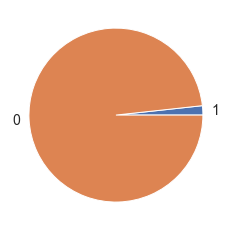

In [7]:
#find the duplicated
df_duplicated = df_raw.loc[df_raw.duplicated(), :]

#plot a pie graph to see clss balacing
duplicated = [(df_duplicated['Class'] == 1).sum(), df_duplicated['Class'].shape[0]]
print(duplicated)
plt.pie(duplicated, labels=['1', '0']) 
plt.show()

As we can see, only 1,75% of the duplicated are fradulent and the duplicated are small compared to the whole dataset. I think it's ok to remove them from the dataset.

In [8]:
# drop duplicated
df_clean = df_raw.drop_duplicates()

# check new df size
df_clean.shape

(283726, 31)

In [9]:
df_clean.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


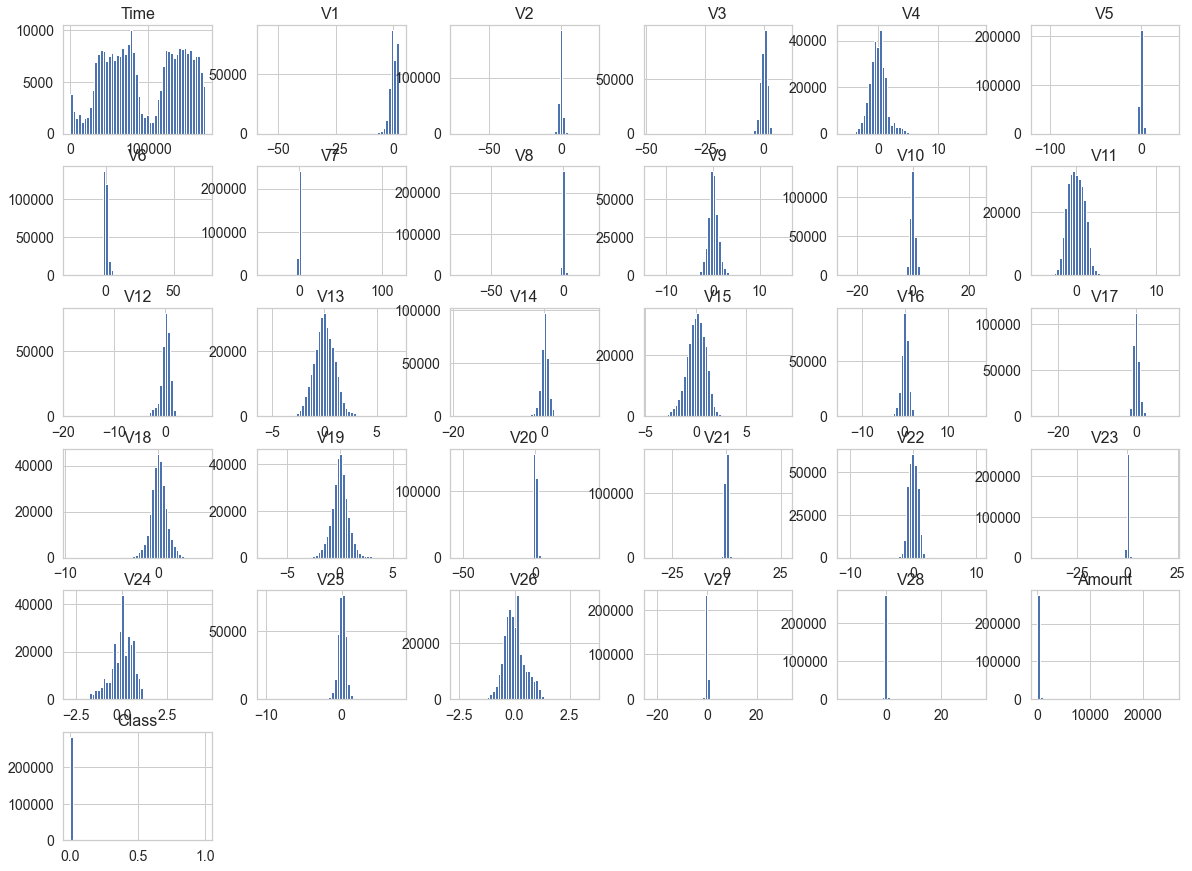

In [10]:
# plot a histogram for each numeric attibute from the dataframe
df_clean.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

Plotting the histogram for each numeric attribute, we can seer most looks like gaussian curve.
We can see that there is a disbalance in the Class attribute, we must pay attention to this wen creating ou machine learning model.

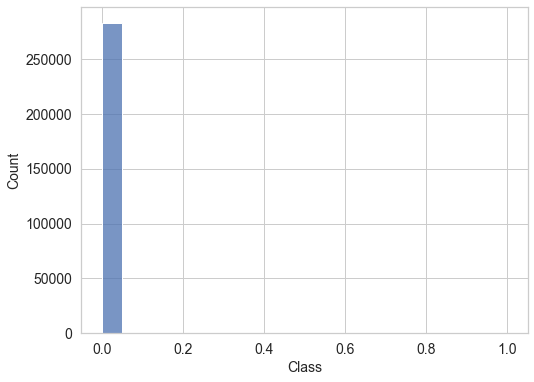

[473, 283726]


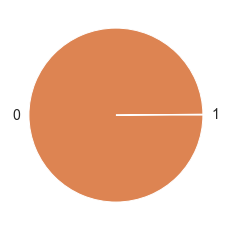

In [11]:

plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Class'])
plt.grid(True)
plt.show()

#plot a pie graph to see class balacing
df_class = [(df_clean['Class'] == 1).sum(), df_clean['Class'].shape[0]]
print(df_class)
plt.pie(df_class, labels=['1', '0']) 
plt.show()

We can see numerically the disbalance. **0.1% are fradulent!**

## 2.1 Univariate Analysis
Let's see if we can learn something about each attribute that we know what they mean:
- Time
- Amount

In [12]:
#divide between positive and negative class
df_positive = df_clean[df_clean['Class'] == 1]
df_negative = df_clean[df_clean['Class'] == 0]

### 2.1.1 Univariate Analysis - Time
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

In [13]:
df_clean['Time'].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

In [14]:
df_clean['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

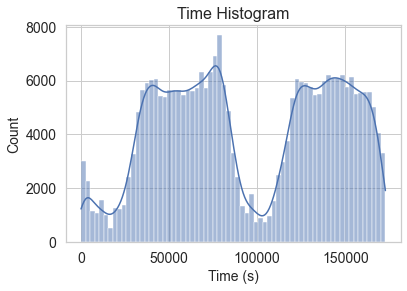

In [15]:
sns.histplot(df_clean['Time'], kde=True)
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Time Histogram')
plt.show()

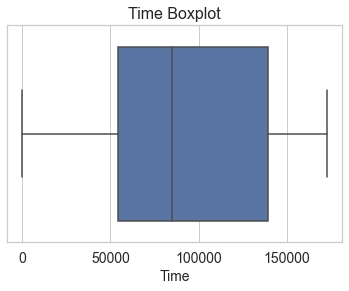

In [16]:
sns.boxplot(data=df_clean, x='Time')
plt.title('Time Boxplot')
plt.show()

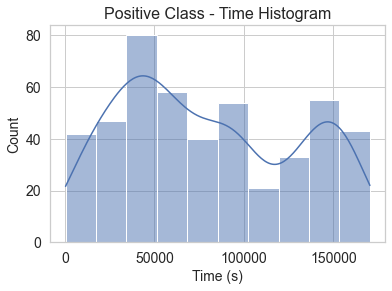

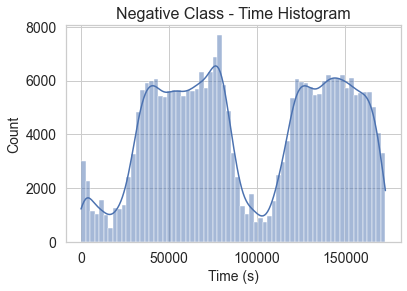

In [17]:
sns.histplot(df_positive['Time'], kde=True)
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Positive Class - Time Histogram')
plt.show()

sns.histplot(df_negative['Time'], kde=True)
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Negative Class - Time Histogram')
plt.show()

### 2.1.2 Univariate Analysis - Amount
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning

In [18]:
df_clean['Amount'].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
df_clean['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

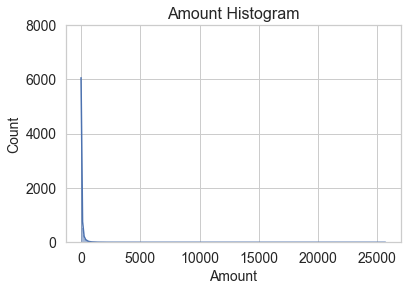

In [20]:
sns.histplot(df_clean['Amount'], kde=True)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.ylim(0, 8000)
plt.title('Amount Histogram')
plt.show()

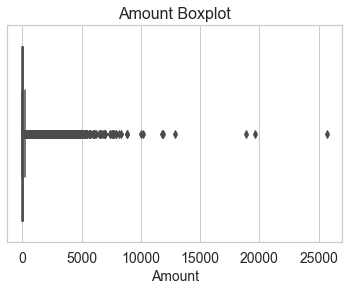

In [21]:
sns.boxplot(data=df_clean, x='Amount')
plt.title('Amount Boxplot')
plt.show()

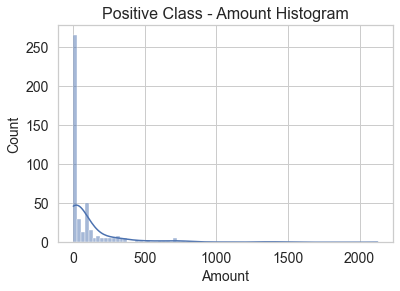

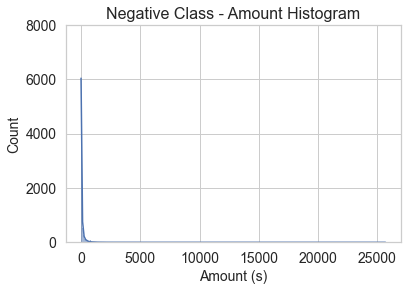

In [22]:
sns.histplot(df_positive['Amount'], kde=True)
plt.xlabel('Amount')
plt.ylabel('Count')
plt.title('Positive Class - Amount Histogram')
plt.show()

sns.histplot(df_negative['Amount'], kde=True)
plt.xlabel('Amount (s)')
plt.ylabel('Count')
plt.ylim(0, 8000)
plt.title('Negative Class - Amount Histogram')
plt.show()

At least, most of fradulent transactions are low value.

## 2.2 Bivariate Analysis
- We use bivariate analysis to find out relations between two variables.
- For bivariate analysis, usually we use: bloxplot (categorical vs numerical), dispersion graph (numerical vs numerical) or contigence table(categorical vs categorical)


Text(0, 0.5, 'Amount')

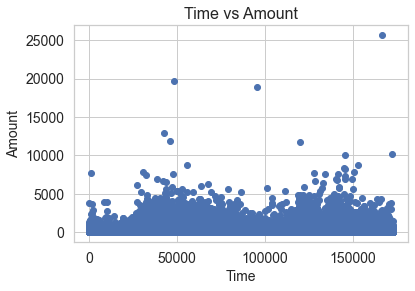

In [23]:
plt.scatter(df_clean['Time'], df_clean['Amount'])
plt.title('Time vs Amount')
plt.xlabel('Time')
plt.ylabel('Amount')

This dispersion graph doesn't show any relation between time and amount.

### 2.3 Correlation among variables

In [25]:
# uncomment if wants to see. It's very low to run
sns.pairplot(data=df_clean)

## 3. Creating training and test datasets
Considering our dataset is ready for machine learning dataset, let's divide it into train and test datasets.
The proportion will be:
- 75% for training
- 25% for testing

In [26]:
from sklearn.model_selection import train_test_split

y_column = 'Class'
y = df_clean[y_column]

X = df_clean[df_clean.columns.drop(y_column)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(212794, 30)
(70932, 30)


Remember that the dataset is unbalanced.

## 4. Creating and Evaluating Machine Learning models

Function to print accuracy

In [27]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, auc

# printing functions
def display_scores(scores):
    #print("Scores:", scores)
    print("Training Recall (mean): %.3f" % scores.mean())
    print("Standard deviation: %.3f" % scores.std())
    print() #spacing

In [28]:
def display_confusion_matrix(predicted, tested):
    print(classification_report(tested,predicted))  
    
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix(tested, predicted)), annot=True,  annot_kws={"size": 16}, cmap="YlGnBu")    
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    # show the plot
    plt.show()

In [29]:
def print_auprc(x_test, y_test, y_pred, y_prob):
    y_prob = y_prob[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    f1, auc_value = f1_score(y_test, y_pred), auc(recall, precision)

    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()
    
    # summarize scores
    #print('Scores: f1=%.3f auc=%.3f' % (f1, auc_value))
    
    return f1, auc_value

In [30]:
def train_test_model(model, x_train, y_train, x_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(x_test)
    display_confusion_matrix(y_pred, y_test)
    
    print(type(model).__name__)
    
    #svm does not have predict_proba, so we cant calculate auprc
    if type(model).__name__ == 'LinearSVC' or type(model).__name__ == 'SVC':
        print("Test Summary:")
        print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
        print('Precision: %.3f' % precision_score(y_test, y_pred))
        print('F1 Score: %.3f ' %  f1_score(y_test, y_pred))
        print('Recall Score: %.3f ' %  recall_score(y_test, y_pred))
    else:    
        y_prob = model.predict_proba(X_test)
        f1, auc_value = print_auprc(X_test, y_test, y_pred, y_prob)
        print("Test Summary:")
        print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
        print('AUPRC: %.3f ' %  auc_value)
        print('Precision: %.3f' % precision_score(y_test, y_pred))
        print('F1 Score: %.3f ' %  f1_score(y_test, y_pred))
        print('Recall Score: %.3f ' %  recall_score(y_test, y_pred))

In [31]:
def test_model(model, x_test, y_test):
    y_pred = model.predict(x_test) 
    if type(model).__name__ == 'LinearSVC' or type(model).__name__ == 'SVC':
        print("Test Summary:")
        print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
        print('Precision: %.3f' % precision_score(y_test, y_pred))
        print('F1 Score: %.3f ' %  f1_score(y_test, y_pred))
        print('Recall Score: %.3f ' %  recall_score(y_test, y_pred))
    else:    
        y_prob = model.predict_proba(x_test)
        f1, auc_value = print_auprc(x_test, y_test, y_pred, y_prob)
        print("Test Summary:")
        print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
        print('AUPRC: %.3f ' %  auc_value)
        print('Precision: %.3f' % precision_score(y_test, y_pred))
        print('F1 Score: %.3f ' %  f1_score(y_test, y_pred))
        print('Recall Score: %.3f ' %  recall_score(y_test, y_pred))
    return y_pred

### 4.1 Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg_results = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='recall')

display_scores(log_reg_results)

#train_test_model(log_reg, X_train, y_train, X_test, y_test)

Training Recall (mean): 0.717
Standard deviation: 0.093



In [33]:
from datetime import datetime

start_time = datetime.now()

log_reg.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))


Time taken: 0 hours 0 minutes and 3.35 seconds.


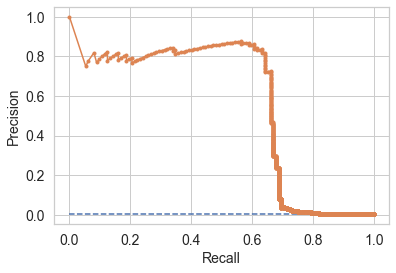

Test Summary:
Accuracy: 0.999
AUPRC: 0.559 
Precision: 0.774
F1 Score: 0.702 
Recall Score: 0.643 


In [34]:
log_reg_pred = test_model(log_reg, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.77      0.64      0.70       112

    accuracy                           1.00     70932
   macro avg       0.89      0.82      0.85     70932
weighted avg       1.00      1.00      1.00     70932



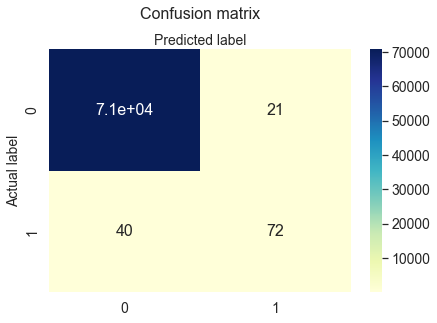

In [35]:
display_confusion_matrix(log_reg_pred, y_test)

### 4.2 SVM

In [36]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42)
svm_results = cross_val_score(svm, X_train, y_train, scoring="recall", cv=5, n_jobs = -1)

display_scores(svm_results)

Training Recall (mean): 0.169
Standard deviation: 0.092



In [37]:
start_time = datetime.now()

svm.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))

Time taken: 0 hours 0 minutes and 48.6 seconds.


In [38]:
svm_pred = test_model(svm, X_test, y_test)

Test Summary:
Accuracy: 0.998
Precision: 1.000
F1 Score: 0.069 
Recall Score: 0.036 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       1.00      0.04      0.07       112

    accuracy                           1.00     70932
   macro avg       1.00      0.52      0.53     70932
weighted avg       1.00      1.00      1.00     70932



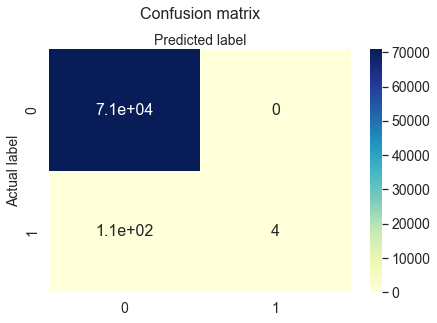

In [39]:
display_confusion_matrix(svm_pred, y_test)

### 4.3 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt_results = cross_val_score(dt, X_train, y_train, scoring="recall", cv=5, n_jobs = -1)

display_scores(dt_results)

Training Recall (mean): 0.773
Standard deviation: 0.082



In [41]:
start_time = datetime.now()

dt.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))

Time taken: 0 hours 0 minutes and 24.14 seconds.


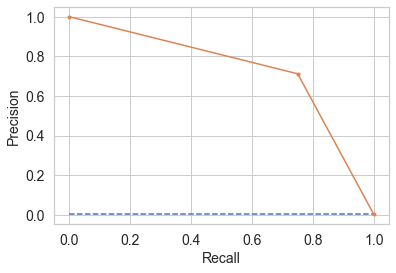

Test Summary:
Accuracy: 0.999
AUPRC: 0.731 
Precision: 0.712
F1 Score: 0.730 
Recall Score: 0.750 


In [42]:
df_pred = test_model(dt, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.71      0.75      0.73       112

    accuracy                           1.00     70932
   macro avg       0.86      0.87      0.86     70932
weighted avg       1.00      1.00      1.00     70932



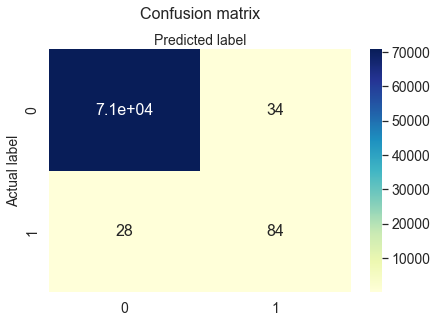

In [43]:
display_confusion_matrix(df_pred, y_test)

## 4.4 Random Forest

In [44]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf_results = cross_val_score(rf, X_train, y_train,cv=5, scoring="recall", n_jobs = -1)

display_scores(rf_results)

Training Recall (mean): 0.778
Standard deviation: 0.086



In [45]:
start_time = datetime.now()

rf.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))

Time taken: 0 hours 3 minutes and 16.11 seconds.


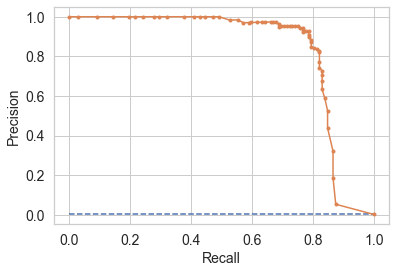

Test Summary:
Accuracy: 1.000
AUPRC: 0.835 
Precision: 0.953
F1 Score: 0.828 
Recall Score: 0.732 


In [46]:
rf_pred = test_model(rf, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.95      0.73      0.83       112

    accuracy                           1.00     70932
   macro avg       0.98      0.87      0.91     70932
weighted avg       1.00      1.00      1.00     70932



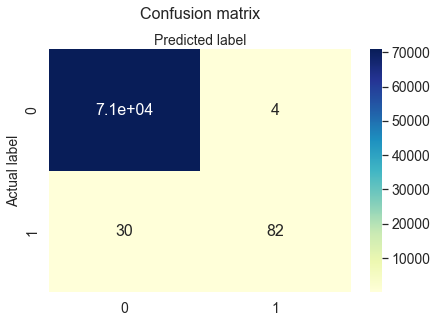

In [47]:
display_confusion_matrix(rf_pred, y_test)

### 4.5 XGBoost

In [48]:
#uncomment if need to install
#!pip install xgboost

In [49]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier_results = cross_val_score(xgb_classifier, X_train, y_train,cv=5, scoring="recall", n_jobs = -1, verbose = 10)

display_scores(xgb_classifier_results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.9min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.9min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.5min finished


Training Recall (mean): 0.784
Standard deviation: 0.084



In [50]:
start_time = datetime.now()

xgb_classifier.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))

Time taken: 0 hours 1 minutes and 17.21 seconds.


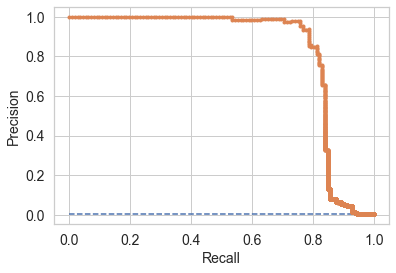

Test Summary:
Accuracy: 1.000
AUPRC: 0.832 
Precision: 0.956
F1 Score: 0.851 
Recall Score: 0.768 


In [51]:
xgb_pred = test_model(xgb_classifier, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70820
           1       0.96      0.77      0.85       112

    accuracy                           1.00     70932
   macro avg       0.98      0.88      0.93     70932
weighted avg       1.00      1.00      1.00     70932



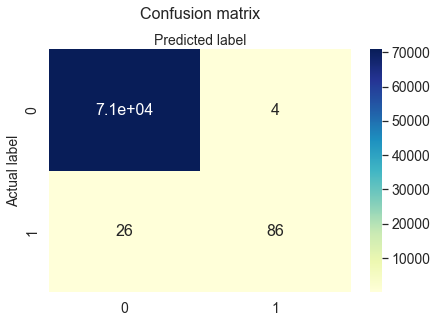

In [52]:
display_confusion_matrix(xgb_pred, y_test)

### 4.6 Results 

As the classes are totally unbalanced, we will look into AUPRC and Recall. The accuracy of all models are close to 1 due to it's unbalance, so we won't look at it.

Remember, the recall measures the model's ability to detect Positive samples. That's what we are looking for!

    | Model               | AUPRC           | Recall
    __________________________________________________________
    
    | Logistic Regression |   0.559         | 0.643
    | SVM *               |   -             | 0.035
    | Decision Tree       |   0.731         | 0.750   
    | Random Forest       |   0.835         | 0.732 
    | XGBoost             |   0.832         | 0.768

PS:   SVM acan not have the Area Under Precision Recall Curve because it does not have the predict_proba function that returns the probability of it's classification.

As expected, SVMs were pretty bad due to unbalance.

As we can see above the two best models are **XGBoost, Random Forest and Decision Tree**.  


## 5. Fine Tuning best models

As we saw above, the best models were XGBoost ,Random Forest and Random Forest, let's try to improve them.

### 5.1 Fine Tuning the Random Forest

Let's look into the current parameters

In [53]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


let's create a list of parameter to search for the best one

In [54]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 5)]
max_depth.append(None)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'n_estimators': [10, 50, 100]
}

In [55]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = param_grid, random_state=42, n_jobs = -1)

looking (training) for the best hyperparameter for the model

In [57]:
start_time = datetime.now()

rf_random.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))

Time taken: 0 hours 41 minutes and 8.23 seconds.


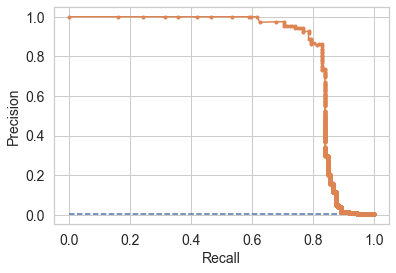

Test Summary:
Accuracy: 1.000
AUPRC: 0.833 
Precision: 0.944
F1 Score: 0.836 
Recall Score: 0.750 


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
test_model(rf_random, X_test, y_test)

In [59]:
rf_random.best_params_

{'n_estimators': 50, 'max_depth': 20, 'bootstrap': False}

The above parameter were the best 

### 5.2 Fine Tuning XGBoost

Let's look into the currente parameters

In [60]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgb_classifier.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': None,
 'validate_parameters': 1,
 'verbosity': None}


Crete a list of hyperparameters

In [61]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }

In [63]:
xgb_random = RandomizedSearchCV(xgb_classifier, param_distributions = param_grid, n_jobs=-1, random_state=42 )

Looking (training) for the best hyperparameters

In [64]:
start_time = datetime.now()

xgb_random.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Time taken: 0 hours 45 minutes and 54.05 seconds.


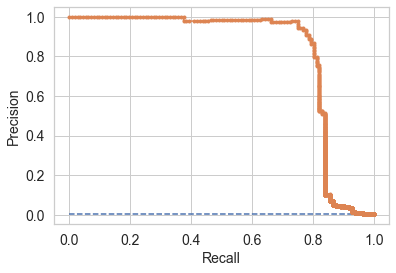

Test Summary:
Accuracy: 1.000
AUPRC: 0.820 
Precision: 0.944
F1 Score: 0.836 
Recall Score: 0.750 


array([0, 0, 0, ..., 0, 0, 0])

In [65]:
test_model(xgb_random, X_test, y_test)

In [66]:
xgb_random.best_params_

{'min_child_weight': 10, 'max_depth': 5, 'gamma': 1.5}

### 5.3 Fine Tuning the Decision Tree

Let's look into the current parameters

In [67]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


let's create a list of parameter to search for the best one

In [74]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 40, num = 5)]
max_depth.append(None)

# Create the param grid
param_grid = {
    'max_depth': max_depth,
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [75]:
dt_random = RandomizedSearchCV(estimator = dt,param_distributions = param_grid, random_state=42, n_jobs = -1)

looking (training) for the best hyperparameter for the model

In [76]:
start_time = datetime.now()

dt_random.fit(X_train, y_train)

time_hour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
time_min, time_sec = divmod(temp_sec, 60)

print('Time taken: %i hours %i minutes and %s seconds.' % (time_hour, time_min, round(time_sec, 2)))

Time taken: 0 hours 5 minutes and 32.45 seconds.


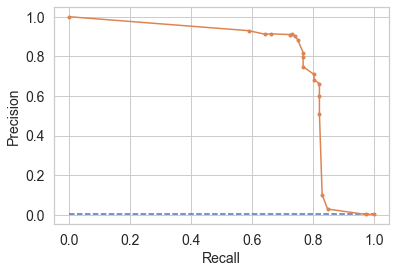

Test Summary:
Accuracy: 0.999
AUPRC: 0.774 
Precision: 0.902
F1 Score: 0.814 
Recall Score: 0.741 


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
test_model(dt_random, X_test, y_test)

In [78]:
dt_random.best_params_

{'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}

The above parameter were the best 

#### Evaluating: old vs new results

    | Model               | AUPRC           | Recall
    __________________________________________________________
    
    | Decision Tree (old) |   0.731         | 0.750
    | Decision Tree (new) |   0.774         | 0.741    
  
    | Random Forest (old) |   0.835         | 0.732
    | Random Forest (new) |   0.833         | 0.750
    
    | XGBoost (old)       |   0.832         | 0.758
    | XGBoost (new)       |   0.820         | 0.750

As we can see, the fine tuning did'n have any substantial improve to any model

### What else can be done ?

- Downsampling on the negative class
- Try SMOTE
- Remove some features or categorize them 
- Try other Fine Tuning hyperparamter (had to set fewer than wanted, because my PC is very slow)

## References:
Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.section.io/engineering-education/random-search-hyperparameters/